In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
X_train = np.load("train/x_128_train.npy")
train_64 = np.load("train/x_64_train.npy")
y_acrosome_train = np.load("train/y_acrosome_train.npy")
y_head_train = np.load("train/y_head_train.npy")
y_tail_train = np.load("train/y_tail_train.npy")
y_vacuole_train = np.load("train/y_vacuole_train.npy")

In [3]:
X_test = np.load("test/x_128_test.npy")
test_64 = np.load("test/x_64_test.npy")
y_acrosome_test = np.load("test/y_acrosome_test.npy")
y_head_test = np.load("test/y_head_test.npy")
y_tail_test = np.load("test/y_tail_test.npy")
y_vacuole_test = np.load("test/y_vacuole_test.npy")

In [4]:
valid = np.load("validation/x_128_valid.npy")
valid_64 = np.load("validation/x_64_valid.npy")
y_acrosome_valid = np.load("validation/y_acrosome_valid.npy")
y_head_valid = np.load("validation/y_head_valid.npy")
y_tail_valid = np.load("validation/y_tail_valid.npy")
y_vacuole_valid = np.load("validation/y_vacuole_valid.npy")

In [5]:
single = X_train[100]

In [6]:
def show(image):
    plt.figure(figsize=(6, 6), dpi = 300)
    fig = plt.imshow(image)
    return fig

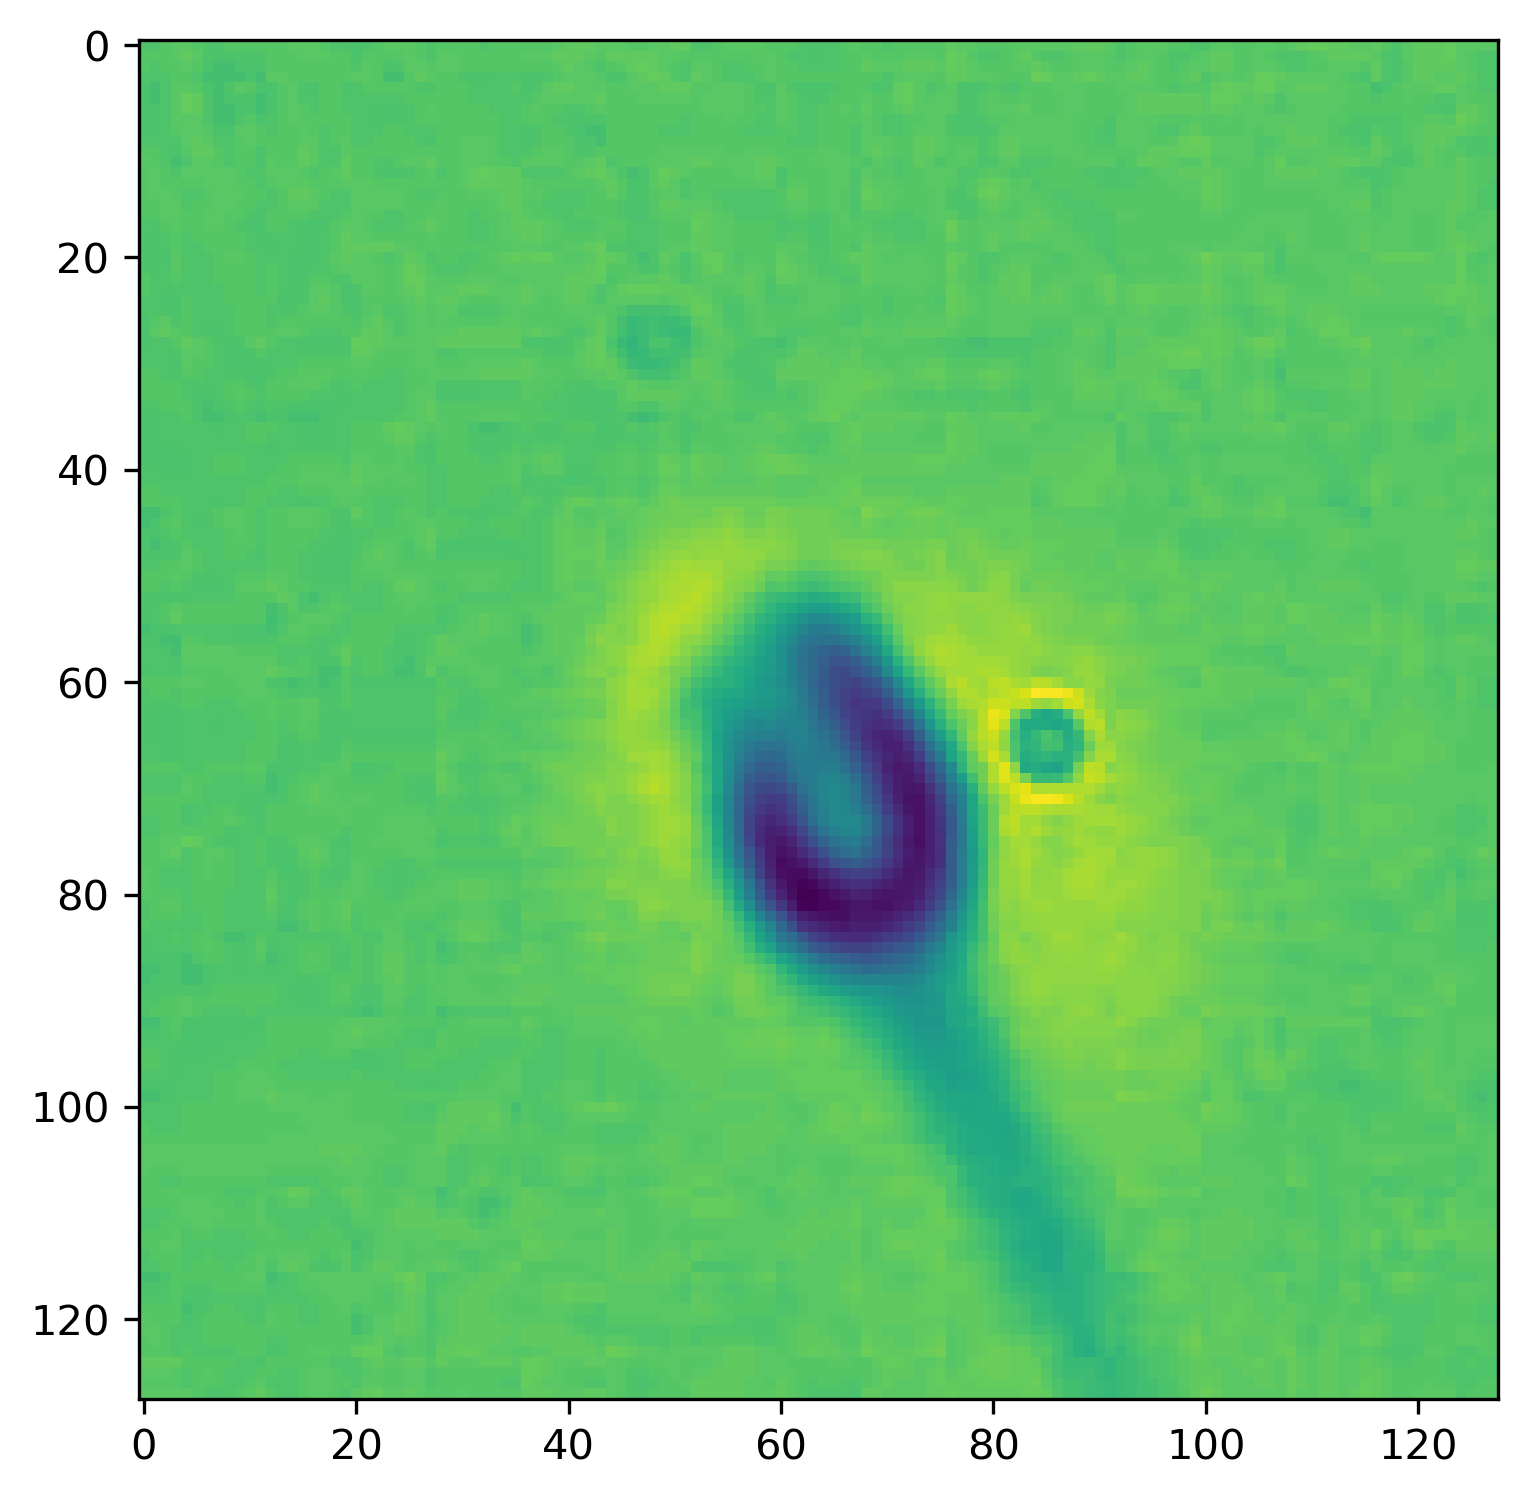

In [7]:
show(single)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
X_train, X_test = X_train.reshape(1000, 128, 128, 1), X_test.reshape(300, 128, 128, 1)
X_train, X_test = X_train/194, X_test/191

In [10]:
y_acrosome_train = to_categorical(y_acrosome_train, num_classes=2)
y_acrosome_test = to_categorical(y_acrosome_test, num_classes=2)

In [11]:
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (4, 4), padding = 'VALID', input_shape = (128, 128, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (4, 4)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience = 5)

In [12]:
model.fit(X_train, y_acrosome_train, epochs = 25, validation_data=(X_test, y_acrosome_test), callbacks = [early_stop])

Epoch 1/25
32/32 [==============================] - 8s 251ms/step - loss: 0.7058 - accuracy: 0.6990 - val_loss: 0.6060 - val_accuracy: 0.7100
Epoch 2/25
32/32 [==============================] - 8s 245ms/step - loss: 0.6187 - accuracy: 0.6990 - val_loss: 0.6050 - val_accuracy: 0.7100
Epoch 3/25
32/32 [==============================] - 8s 247ms/step - loss: 0.6173 - accuracy: 0.6990 - val_loss: 0.6013 - val_accuracy: 0.7100
Epoch 4/25
32/32 [==============================] - 8s 246ms/step - loss: 0.6127 - accuracy: 0.6990 - val_loss: 0.6037 - val_accuracy: 0.7100
Epoch 5/25
32/32 [==============================] - 8s 244ms/step - loss: 0.6123 - accuracy: 0.6990 - val_loss: 0.6012 - val_accuracy: 0.7100
Epoch 6/25
32/32 [==============================] - 8s 244ms/step - loss: 0.6152 - accuracy: 0.6990 - val_loss: 0.6062 - val_accuracy: 0.7100


<AxesSubplot:>

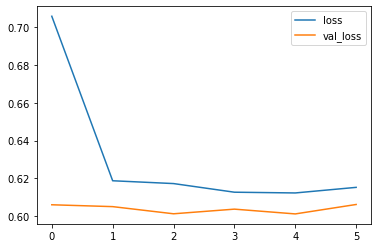

In [13]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

In [14]:
model.evaluate(X_test, y_acrosome_test, verbose = 0)

[0.6061823964118958, 0.7099999785423279]